### Week2授業課題2 富士下山問題

#### 標高データの取得

In [1]:
'''
モジュールのインポート
'''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
データの取得
'''
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[:3, :1])

[[0.]
 [1.]
 [2.]]


#### 【問題1】データの可視化

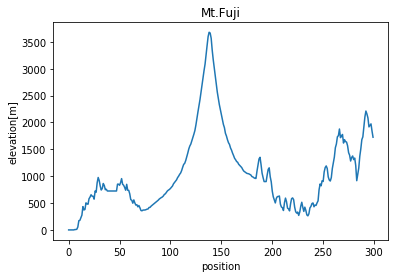

In [4]:
'''
標高データの可視化
'''
x = fuji[:, :1]
y = fuji[:, 3]
plt.plot(x, y)
plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.show()

#### 【問題2】ある地点の勾配を計算する関数を作成

In [5]:
'''
ある地点と隣の地点の勾配の計算
'''
# 与えられた地点から勾配を求める関数
def grandient_fun(current_position):
    pre_position = current_position - 1      # current_position=与えられたある地点
    elevation = 3                                            # 標高データ
    x = current_position  - pre_position     # x の変化量　/ y の変化量
    y = fuji[current_position][elevation] \
        - fuji[pre_position][elevation]

    return abs(y / x)

In [6]:
current_position = 161 # 今いる地点
print(grandient_fun(current_position))
print(fuji[current_position][3], fuji[current_position-1][3])

55.690000000000055
1429.03 1484.72


#### 【問題3】移動先の地点を計算する関数を作成

In [7]:
'''
１回だけの更新
'''
# 学習率を元に更新する関数
def next_position_fun(current_position):
    lr = 0.2                                                                                                      # 学習率
    current_grand = grandient_fun(current_position)                            # 勾配
    next_position = int(round(current_position - lr * current_grand)) # 更新式
    
    return next_position

In [8]:
print(next_position_fun(161))

150


#### 【問題4】山を下る関数を作成

In [9]:
'''
収束するまでの更新し、その時の地点のリストを返す
※更新した回数が同じ地点な場合収束したとみなす
'''
# 更新した地点のリストを返す関数
def down_mountain_fun(current_position):
    current_position_n = [current_position]
    num = 100

    # 前のリストの要素を同一な値な場合、収束
    for _ in range(num):
        current_position_n += [next_position_fun(current_position_n[-1])]
        if current_position_n[-2] == current_position_n[-1]:
                break
    return current_position_n[:-1] # 最後の要素数は重複しているため

In [10]:
down_mountain_fun(80)

[80]

#### 【問題5】下山過程の可視化

In [15]:
'''
更新した標高や勾配を折れ線グラフにする
'''
# 更新リストから標高データを取得
def get_elevation(position):
    list_pos = down_mountain_fun(position) # ある地点の更新リストを取得
    list_eve = []                                                   # 標高データの空リスト
    for i in range(len(list_pos)):
        list_eve += [fuji[list_pos[i]][3]]    
    return list_pos, list_eve

# 更新リスト、標高データをグラフにプロット
def get_graph(position):
    x1, y1 = get_elevation(position)
    x2 = fuji[:, :1]
    y2 = fuji[:, 3]
    plt.figure(figsize=(20, 20))
    
    plt.subplot(2,1,1)
    plt.plot(x2, y2)
    plt.plot(x1, y1, marker="*", color = "red", linestyle = ":")
    plt.title('Mt.Fuji')
    plt.xlabel('position')
    plt.ylabel('elevation[m]')
    plt.show()

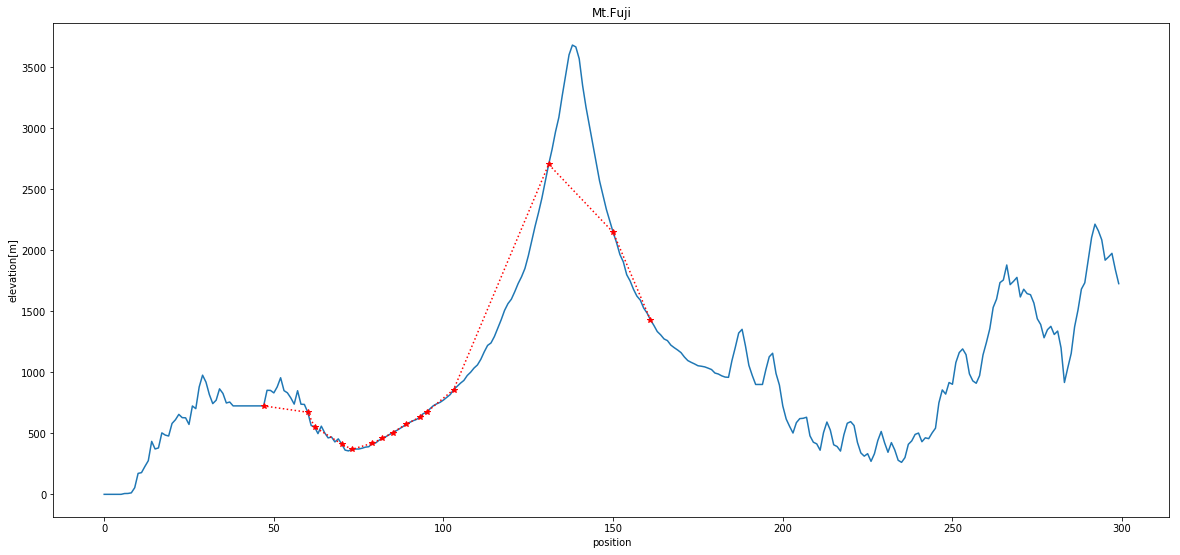

In [16]:
get_graph(161)

#### 【問題6】初期値の変更

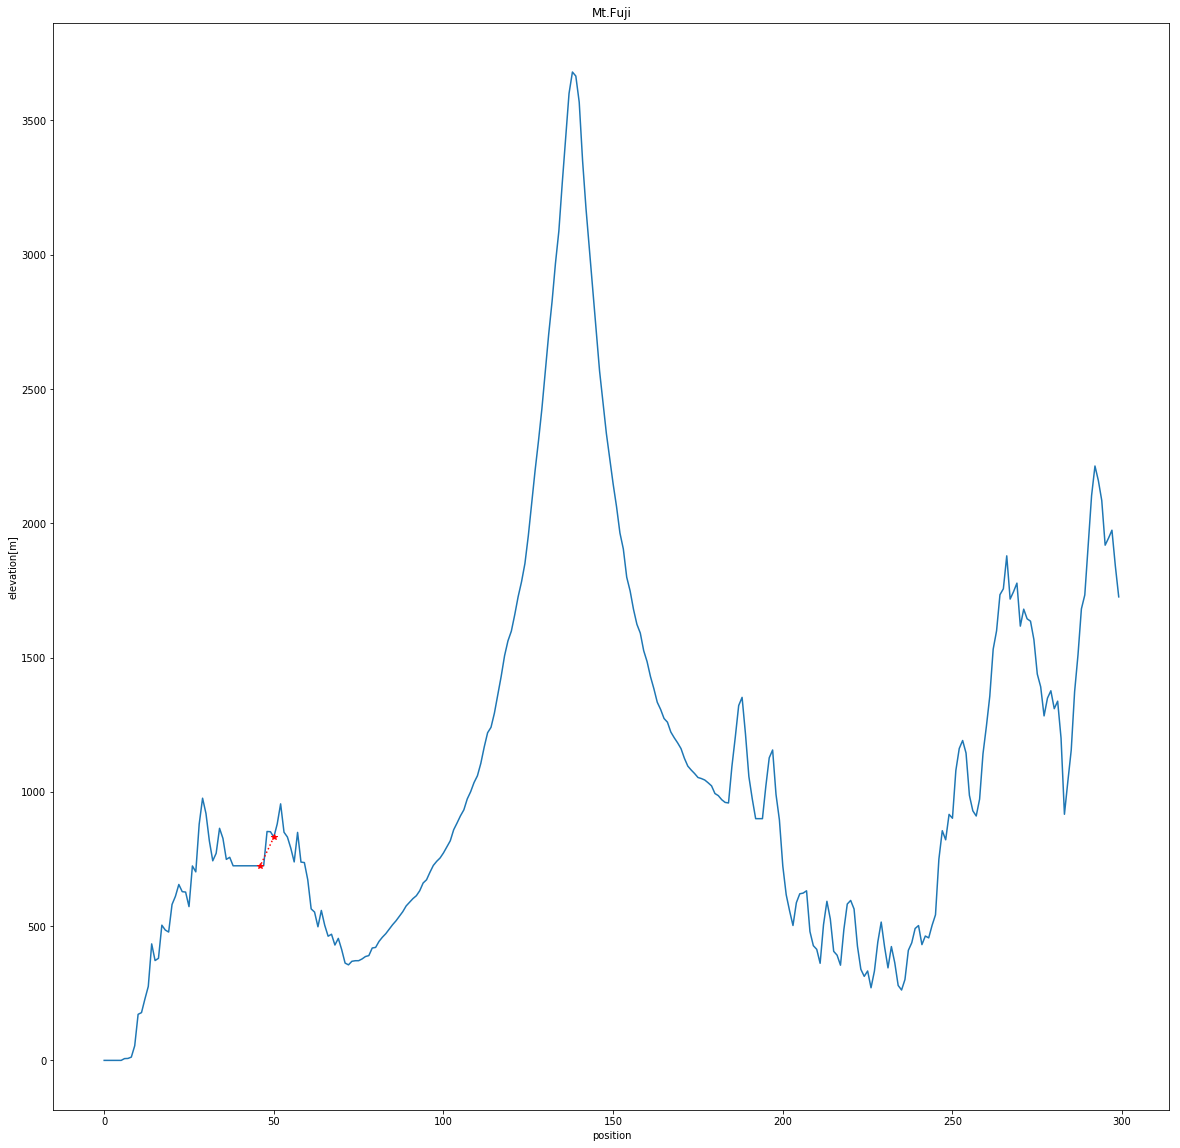

In [13]:
get_graph(50)

#### 【問題7】（アドバンス問題）ハイパーパラメータの変更

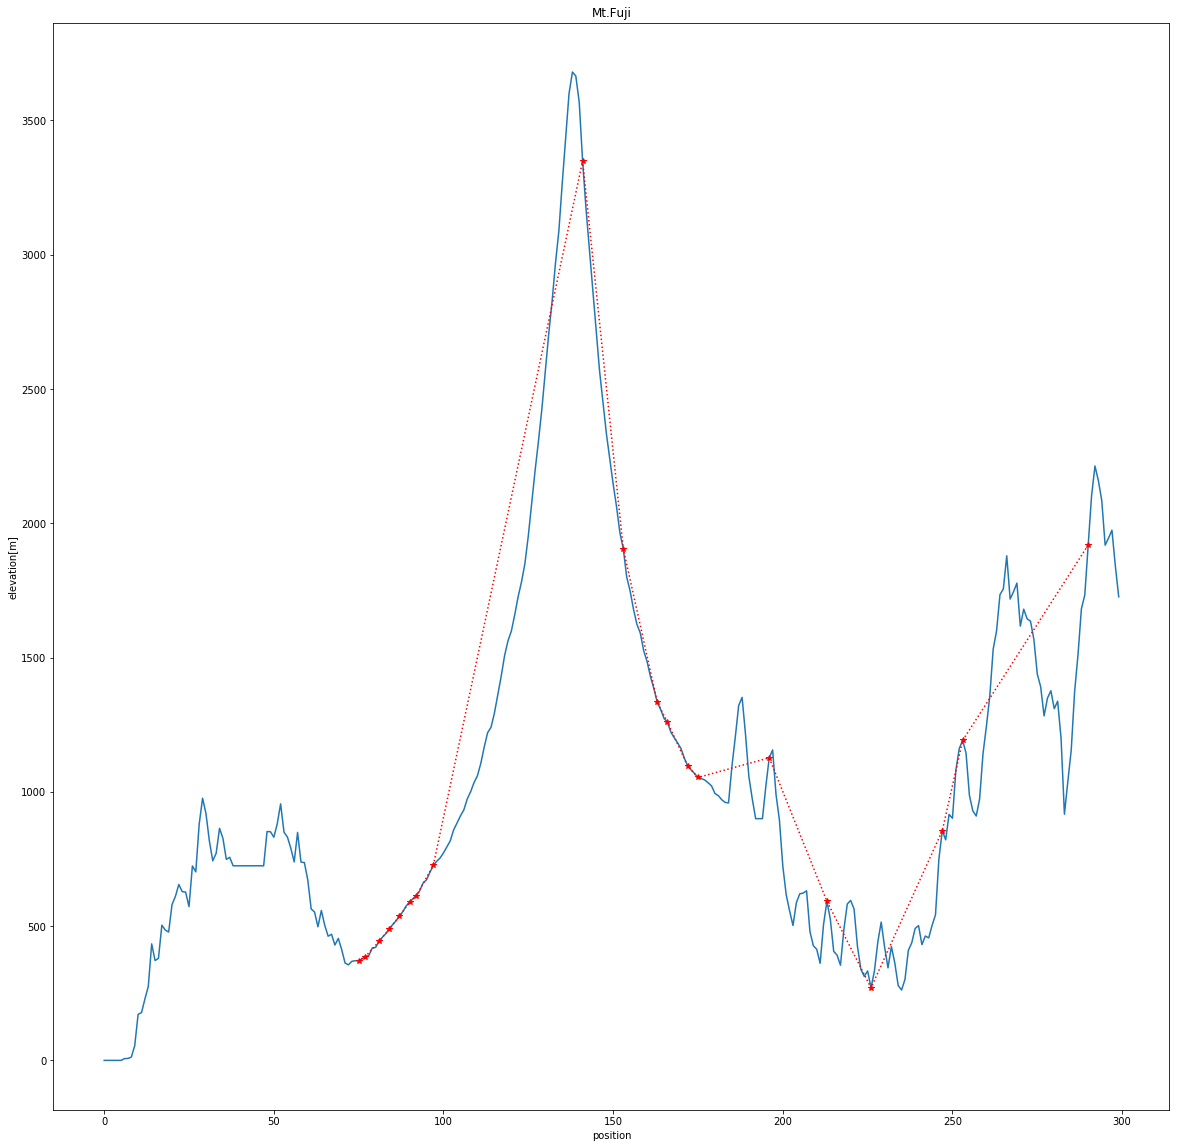

In [14]:
get_graph(290)

【気づき】
更新の収束のトリガーが現在いる位置と更新した位置が一致している場合は収束しているとみなして　　
いるので、機会学習の場合はどのように収束するのか気になりました。　　
(今回は更新した値が切り上がるようにround関数を使っています。)　　
初期値、ハイパーパラメータを変えると、更新度が全然異なっていると思いました。　　
コンピュータから最小値は見えないので、局所解に陥ることがことがあると思いました。　　
初期値を何度が変えて、最小値を確認する必要があると思いました。　　